In [13]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline




In [133]:
import getpass
import os

password = getpass.getpass()
command0 = "sudo -S rm -rf logs*"
command1 = "sudo -S python3 ./runner.py -t topo.yaml -x experiment_rr.yaml" 
command2 = "sudo -S python3 ./runner.py -t topo.yaml -x experiment_rtt.yaml" 
os.system('echo %s | %s' % (password, command1))
os.system('echo %s | %s' % (password, command2))




[sudo] password for ejogarv: 

RUST_LOG=info ../quiche/target/debug/mp_server --listen 10.0.3.10:4433 --cert ../quiche/apps/src/bin/cert.crt --key ../quiche/apps/src/bin/cert.key --root ./ --scheduler rr --path-stats-output ./logs_rr//rr0.csv >> ./logs_rr//server0.log&
RUST_LOG=info ../quiche/target/debug/mp_client -l 10.0.1.1:5555 -w 10.0.2.1:6666 --url https://10.0.3.10:4433/test.bin --download-stats-output ./logs_rr//download0.csv>> ./logs_rr//client0.log
RUST_LOG=info ../quiche/target/debug/mp_server --listen 10.0.3.10:4433 --cert ../quiche/apps/src/bin/cert.crt --key ../quiche/apps/src/bin/cert.key --root ./ --scheduler rr --path-stats-output ./logs_rr//rr1.csv >> ./logs_rr//server1.log&
RUST_LOG=info ../quiche/target/debug/mp_client -l 10.0.1.1:5555 -w 10.0.2.1:6666 --url https://10.0.3.10:4433/test.bin --download-stats-output ./logs_rr//download1.csv>> ./logs_rr//client1.log
RUST_LOG=info ../quiche/target/debug/mp_server --listen 10.0.3.10:4433 --cert ../quiche/apps/src/bin/cert.crt --key ../quiche/apps/src/b

[sudo] password for ejogarv: 

RUST_LOG=info ../quiche/target/debug/mp_server --listen 10.0.3.10:4433 --cert ../quiche/apps/src/bin/cert.crt --key ../quiche/apps/src/bin/cert.key --root ./ --scheduler minRtt --path-stats-output ./logs_rtt//minRtt0.csv >> ./logs_rtt//server0.log&
RUST_LOG=info ../quiche/target/debug/mp_client -l 10.0.1.1:5555 -w 10.0.2.1:6666 --url https://10.0.3.10:4433/test.bin --download-stats-output ./logs_rtt//download0.csv>> ./logs_rtt//client0.log
RUST_LOG=info ../quiche/target/debug/mp_server --listen 10.0.3.10:4433 --cert ../quiche/apps/src/bin/cert.crt --key ../quiche/apps/src/bin/cert.key --root ./ --scheduler minRtt --path-stats-output ./logs_rtt//minRtt1.csv >> ./logs_rtt//server1.log&
RUST_LOG=info ../quiche/target/debug/mp_client -l 10.0.1.1:5555 -w 10.0.2.1:6666 --url https://10.0.3.10:4433/test.bin --download-stats-output ./logs_rtt//download1.csv>> ./logs_rtt//client1.log
RUST_LOG=info ../quiche/target/debug/mp_server --listen 10.0.3.10:4433 --cert ../quiche/apps/src/bin/cert.crt --

0

In [103]:
download_rr = pd.concat([ pd.read_csv("./logs_rr/download{}.csv".format(i),) for i in range(0,5) ])
download_rtt = pd.concat([ pd.read_csv("./logs_rtt/download{}.csv".format(i)) for i in range(0,5) ])

In [104]:
download_rr["mbps"] = download_rr["recv_bytes"] * 8 / (1024)/ download_rr["elapsed"]
download_rtt["mbps"] = download_rtt["recv_bytes"] * 8 / (1024)/ download_rtt["elapsed"]


Text(0.5, 1.0, 'Download speed (Mbps)')

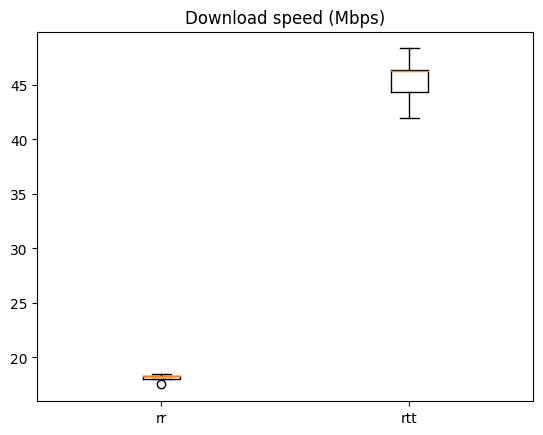

In [105]:

plt.boxplot([download_rr["mbps"], download_rtt["mbps"]], labels=["rr", "rtt"])
plt.title("Download speed (Mbps)")

In [176]:
rr_stats = pd.read_csv("./logs_rr/rr0.csv")
#rr_stats["elapsed"] = pd.to_timedelta(rr_stats["elapsed"], unit="ms")
rr_stats.index = pd.to_timedelta(rr_stats["elapsed"], unit="ms")
rr_stats.head()

,elapsed,local,remote,sent_bytes,recv_bytes,cwnd,bif,rtt
elapsed,,,,,,,,
0 days 00:00:00.032000,32,10.0.3.10:4433,10.0.1.1:5555,1200,357,13500,1200,0
0 days 00:00:00.044000,44,10.0.3.10:4433,10.0.1.1:5555,1683,527,13500,483,11
0 days 00:00:00.064000,64,10.0.3.10:4433,10.0.1.1:5555,3033,737,13500,1278,11
0 days 00:00:00.075000,75,10.0.3.10:4433,10.0.1.1:5555,4383,784,13500,1350,12
0 days 00:00:00.086000,86,10.0.3.10:4433,10.0.1.1:5555,5733,831,13500,1350,12


In [183]:
rtt_stats = pd.read_csv("./logs_rtt/minRtt0.csv")
#rtt_stats["elapsed"] = pd.to_timedelta(rr_stats["elapsed"], unit="ms")
rtt_stats.index= pd.to_timedelta(rtt_stats["elapsed"], unit="ms")
rtt_stats.head()

,elapsed,local,remote,sent_bytes,recv_bytes,cwnd,bif,rtt
elapsed,,,,,,,,
0 days 00:00:00.105000,105,10.0.3.10:4433,10.0.1.1:5555,1683,357,13500,1683,0
0 days 00:00:00.130000,130,10.0.3.10:4433,10.0.1.1:5555,15183,1707,13500,13428,15
0 days 00:00:00.130000,130,10.0.3.10:4433,10.0.1.1:5555,15255,1707,13500,13500,15
0 days 00:00:00.142000,142,10.0.3.10:4433,10.0.1.1:5555,28755,1848,21600,17622,17
0 days 00:00:00.142000,142,10.0.3.10:4433,10.0.1.1:5555,36855,1989,21600,21600,16


In [192]:
remote_addr_lte = "10.0.1.1:5555"
remote_addr_wifi = "10.0.2.1:6666"

rr_stats["path"] = "lte"
rr_stats.loc[rr_stats['remote']==remote_addr_wifi, "path"] = "wifi"

rtt_stats["path"] = "lte"
rtt_stats.loc[rtt_stats['remote']==remote_addr_wifi, "path"] = "wifi"


/tmp/ipykernel_217483/3933794020.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rr_stats.resample("100ms").mean().diff().groupby("path")["sent_bytes"].plot(legend=True)


KeyError: 'path'

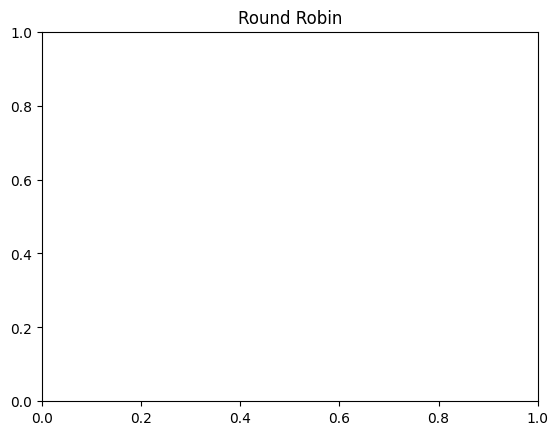

In [205]:
plt.title("Round Robin")
rr_stats.groupby("path")["sent_bytes"].plot(legend=True)





<AxesSubplot: xlabel='elapsed'>

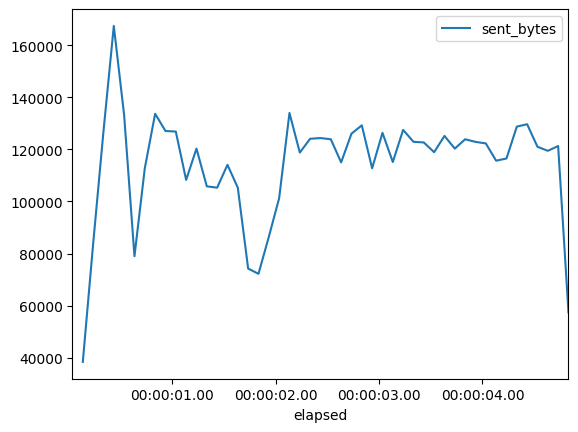

In [190]:
rr_lte[["sent_bytes"]].resample("100ms").mean().diff().plot()

## Round Robin scheduler 

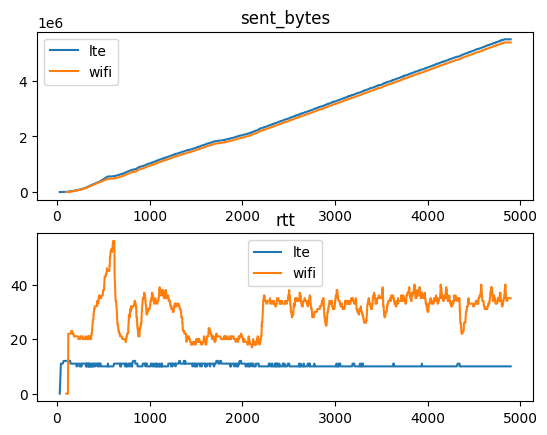

In [120]:
figure,axis =plt.subplots(2,1)

axis[0].plot(rr_lte["elapsed"], rr_lte["sent_bytes"], label="lte")
axis[0].plot(rr_wifi["elapsed"], rr_wifi["sent_bytes"], label="wifi")
axis[0].legend()
axis[0].set_title("sent_bytes")
axis[1].plot(rr_lte["elapsed"], rr_lte["rtt"], label="lte")
axis[1].plot(rr_wifi["elapsed"], rr_wifi["rtt"], label="wifi")
axis[1].set_title("rtt")
axis[1].legend()


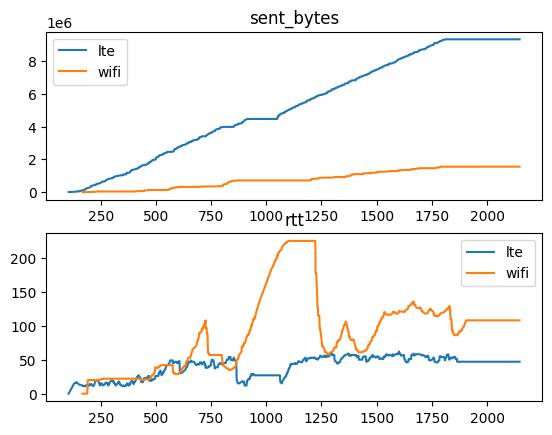

In [117]:
figure,axis =plt.subplots(2,1)

axis[0].plot(rtt_lte["elapsed"], rtt_lte["sent_bytes"], label="lte")
axis[0].plot(rtt_wifi["elapsed"], rtt_wifi["sent_bytes"], label="wifi")
axis[0].legend()
axis[0].set_title("sent_bytes")
axis[1].plot(rtt_lte["elapsed"], rtt_lte["rtt"], label="lte")
axis[1].plot(rtt_wifi["elapsed"], rtt_wifi["rtt"], label="wifi")
axis[1].set_title("rtt")
axis[1].legend()


## RTT scheduler 

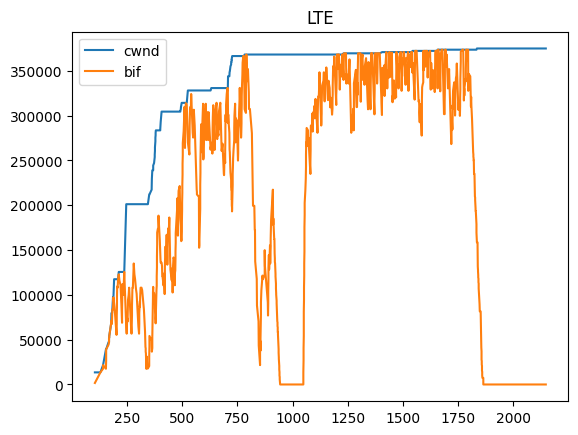

In [118]:
plt.plot(rtt_lte["elapsed"], rtt_lte["cwnd"], label="cwnd")
plt.plot(rtt_lte["elapsed"], rtt_lte["bif"], label="bif")
plt.title("LTE")
plt.legend()


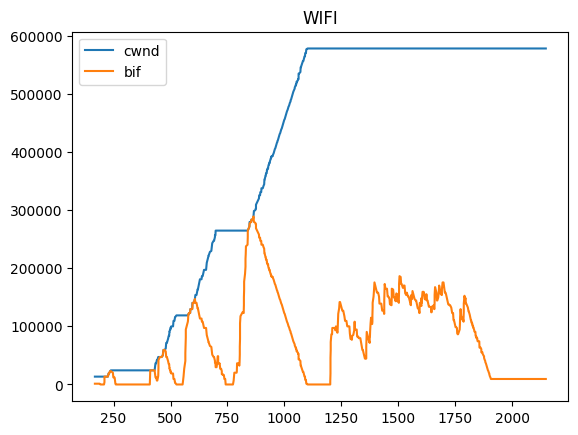

In [119]:
plt.plot(rtt_wifi["elapsed"], rtt_wifi["cwnd"], label="cwnd")
plt.plot(rtt_wifi["elapsed"], rtt_wifi["bif"], label="bif")
plt.title("WIFI")
plt.legend()
